In [93]:
#modules
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [94]:
# reading the data
eeg_data = pd.read_csv("/home/cat/Desktop/sem2/computer science and cognition/Group_project/Datasets/eeg_data.csv")
behavioral_data = pd.read_csv("/home/cat/Desktop/sem2/computer science and cognition/Group_project/Datasets/Dots_30_006_trial_info.csv")

bpath = r'./'  # modify path according to the path on your computer

# EEG DATASET - the .npy data comes from the PCA analysis
frontal_lobe = np.load(bpath + r'pca_data_frontal_lobe.npy')     
occipital_lobe = np.load(bpath + r'pca_data_occipital_lobe.npy')
temporal_left_lobe = np.load(bpath + r'pca_data_temporal_left_lobe.npy')
temporal_right_lobe = np.load(bpath + r'pca_data_temporal_right_lobe.npy')
central_lobe = np.load(bpath + r'pca_data_central_lobe.npy')


# BEHAVIOURAL DATASET
keys_behavioral = behavioral_data.keys()
g_force = np.array(behavioral_data[keys_behavioral[0]]) 
response_id = np.array(behavioral_data[keys_behavioral[1]]) 
response_time = np.array(behavioral_data[keys_behavioral[2]])

In [95]:
# STEP 1 - Preprocessing
"""
The data is already preprocessed
"""

# Stack all arrays vertically
data = np.vstack([frontal_lobe, occipital_lobe, temporal_left_lobe, temporal_right_lobe, central_lobe])  # we use vstack due to having more than 2 arrays (1 array per brain region)


In [96]:
# STEP 2 - define clustering analysis 
# we will do KMeans with respect to the G force since there are not many clusters that G force can go into (in our case)
kmeans = KMeans(n_clusters=len(np.unique(g_force)))
dbscan = DBSCAN()
agglo  = AgglomerativeClustering(n_clusters=len(np.unique(g_force)))

In [97]:
# STEP 3 - run analysis
kmeans.fit(data)
dbscan.fit(data)
agglo.fit(data)

/home/cat/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AgglomerativeClustering(n_clusters=7)

/tmp/ipykernel_35927/2413868710.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(data[:, 0], data[:, 1], c='grey', cmap='tab10', s=100, alpha=0.5)


----------------
[2 4 4 ... 2 1 0]
----------------
[0 0 0 ... 0 0 0]
----------------
[2 2 1 ... 2 4 6]
[2 4 4 ... 2 1 0]


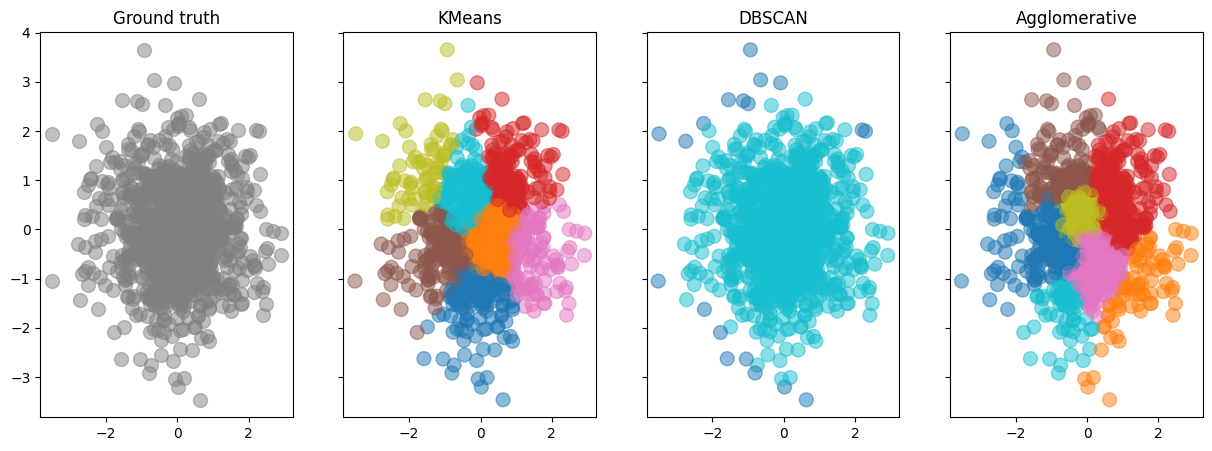

In [98]:
# get labels and plot   STEP 4
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
agglo_labels  = agglo.labels_

colors = [1, 2, 3, 4 ,5]

all_labels = [kmeans_labels, dbscan_labels, agglo_labels]

for label in all_labels:
    print('----------------')
    print(label)

# plot
ana_names = ['Ground truth', 'KMeans', 'DBSCAN', 'Agglomerative']
f, ax = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
ax[0].scatter(data[:, 0], data[:, 1], c='grey', cmap='tab10', s=100, alpha=0.5)
ax[1].scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='tab10', s=100, alpha=0.5)
ax[2].scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='tab10', s=100, alpha=0.5)
ax[3].scatter(data[:, 0], data[:, 1], c=agglo_labels, cmap='tab10', s=100, alpha=0.5)

for i in range(4):
    ax[i].set_title(f'{ana_names[i]}')
    
print(kmeans_labels)